In [1]:
## Location Scan of Incr1 Parameter

# 1 - Find the average waveform for each scan step and plot
# 2 - Zoom in on glitch behavior
# 3 - Plot only Even Blocks
# 4 - Plot only Odd Blocks

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import os.path

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Setting plot default sizes
plt.rc('axes', titlesize = 40)
plt.rc('axes', labelsize = 30)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
plt.rc('legend', fontsize = 20)
plt.rc('figure', titlesize = 40)
plt.figure(figsize(12,9))

In [3]:
data = dict(np.load("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/Incr1 Location/sampleFileAllBlocks_run320624ASIC0CH6.npz", 'r'))
print(data)

{'run': array([320624, 320624, 320624, ..., 320624, 320624, 320624]), 'asic': array([0, 0, 0, ..., 0, 0, 0]), 'block': array([ 96, 154, 376, ..., 352, 506, 168]), 'samples': array([[557, 551, 537, ..., 487, 471, 482],
       [577, 559, 557, ..., 483, 486, 472],
       [599, 597, 596, ..., 518, 530, 525],
       ..., 
       [614, 598, 616, ..., 526, 529, 502],
       [668, 636, 663, ..., 578, 589, 577],
       [544, 543, 543, ..., 500, 498, 474]]), 'phase': array([26, 26, 26, ..., 26, 28, 28]), 'event': array([   0,    1,    2, ..., 4998, 4999, 5000]), 'channel': array([6, 6, 6, ..., 6, 6, 6])}


In [5]:
print(data['phase'])
print(data['phase'][1])

[26 26 26 ..., 26 28 28]
26


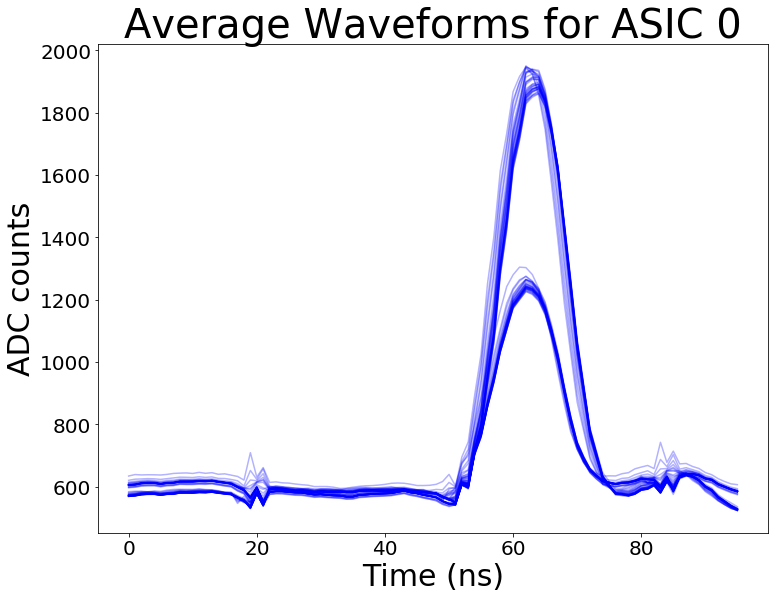

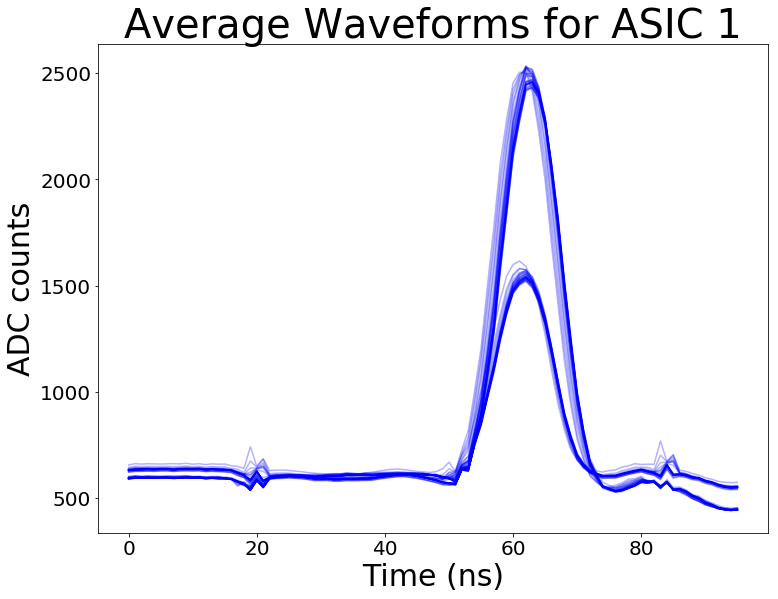

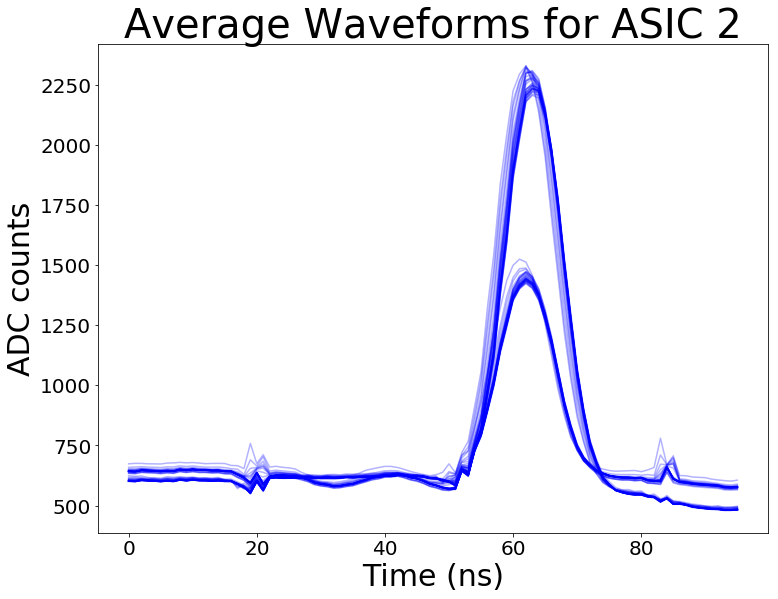

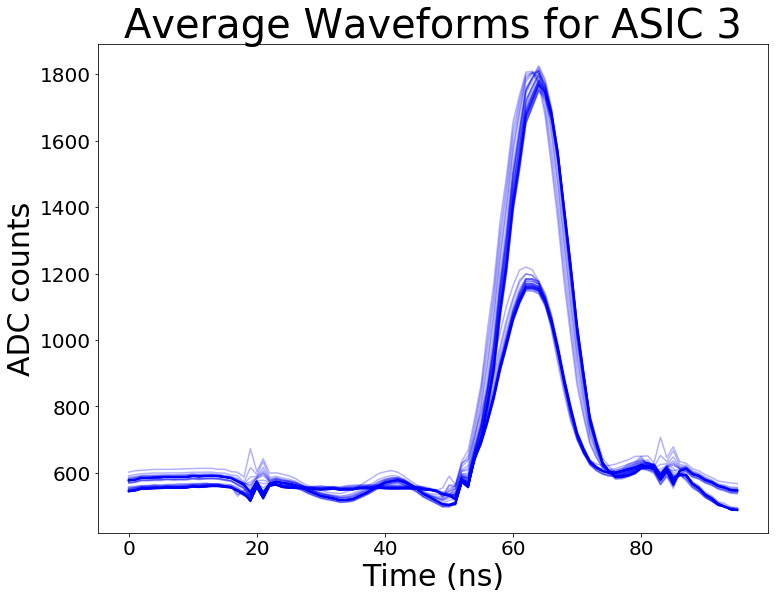

In [3]:
Incr1 = []
for ASIC in range(4):
    runs = []
    start_value = 0
    for run in range(320624,320688):
        data = dict(np.load("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/Incr1 Location/sampleFileAllBlocks_run" + str(run) + "ASIC" + str(ASIC) + "CH6.npz", 'r'))
        waveforms = []
        for event in range(len(data['event'])):
            phase = int(data['phase'][event])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            waveforms.append(data['samples'][event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(len(data['event'])):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str((start_value + 15)%64), color = 'b', alpha = 0.3)
        start_value = start_value + 1
    Incr1.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.show()

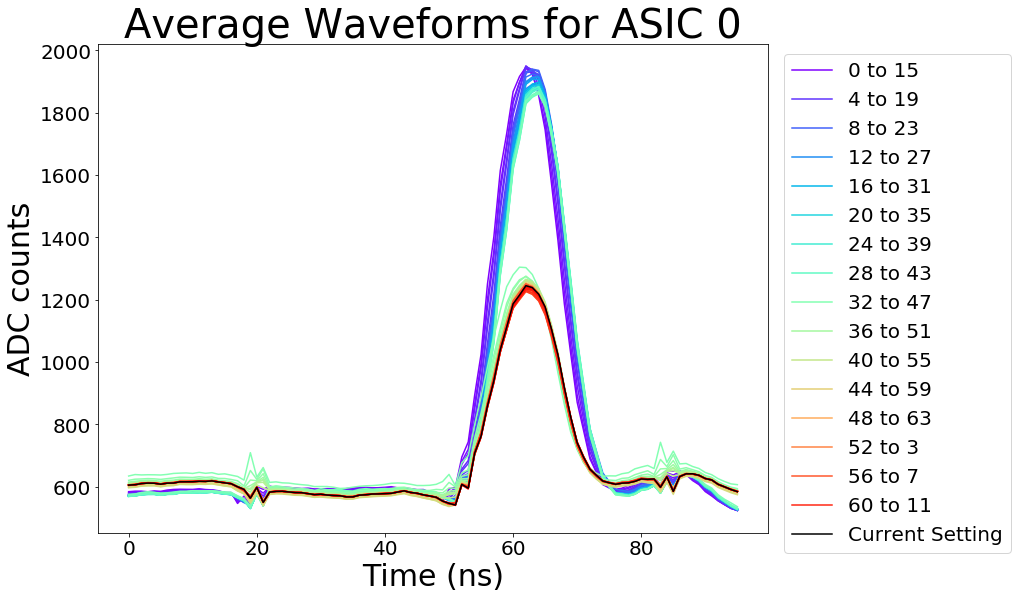

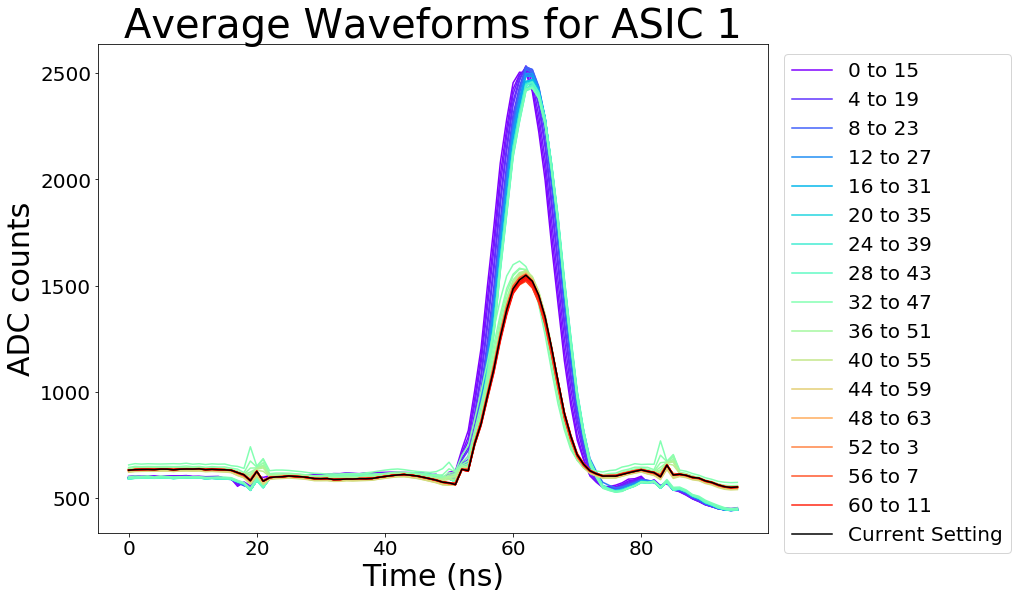

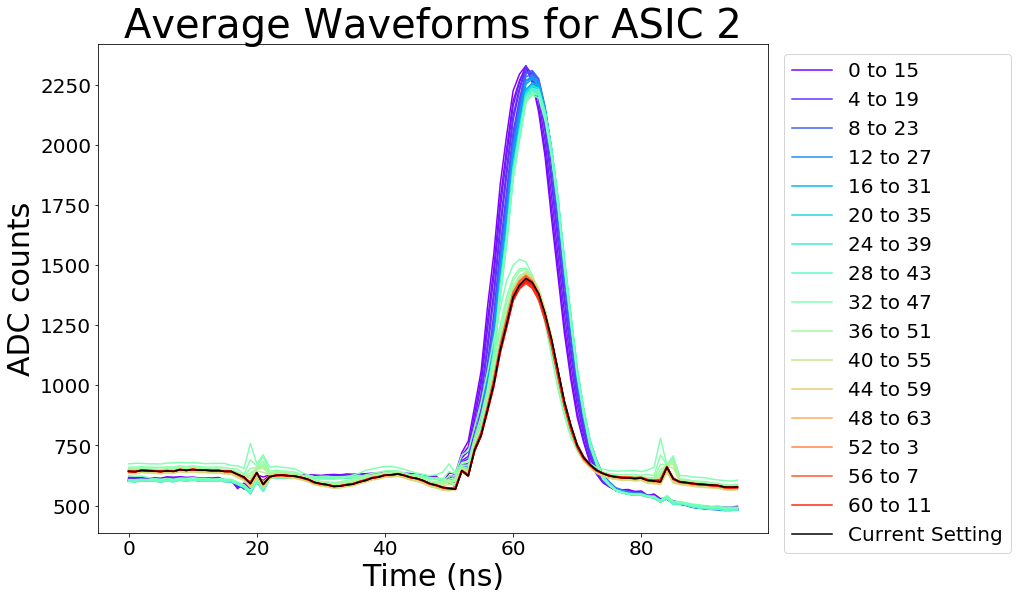

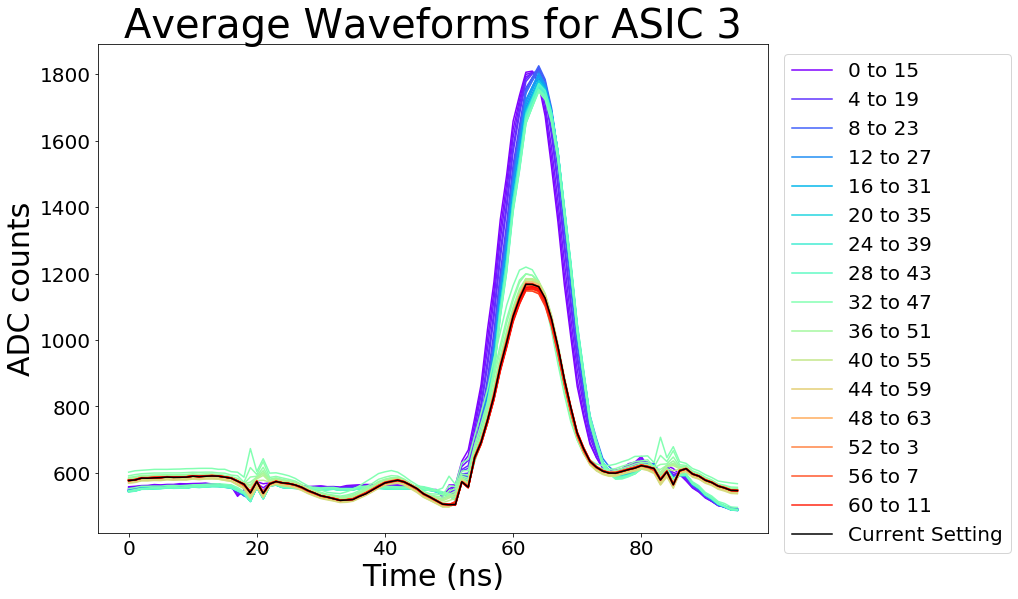

In [5]:
# Plot with rainbow colormap

number_runs = 64
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

for ASIC in range(4):
    start_value = 0
    for run in range(number_runs):
        if run%4==0:
            plt.plot(Incr1[ASIC][run], label = str(start_value) + ' to ' + str((start_value + 15)%64), color = colors[run])
            start_value = start_value + 1
        else:
            plt.plot(Incr1[ASIC][run], color = colors[run])
            start_value = start_value + 1
    plt.plot(Incr1[ASIC][63], label = 'Current Setting', color = 'black')
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

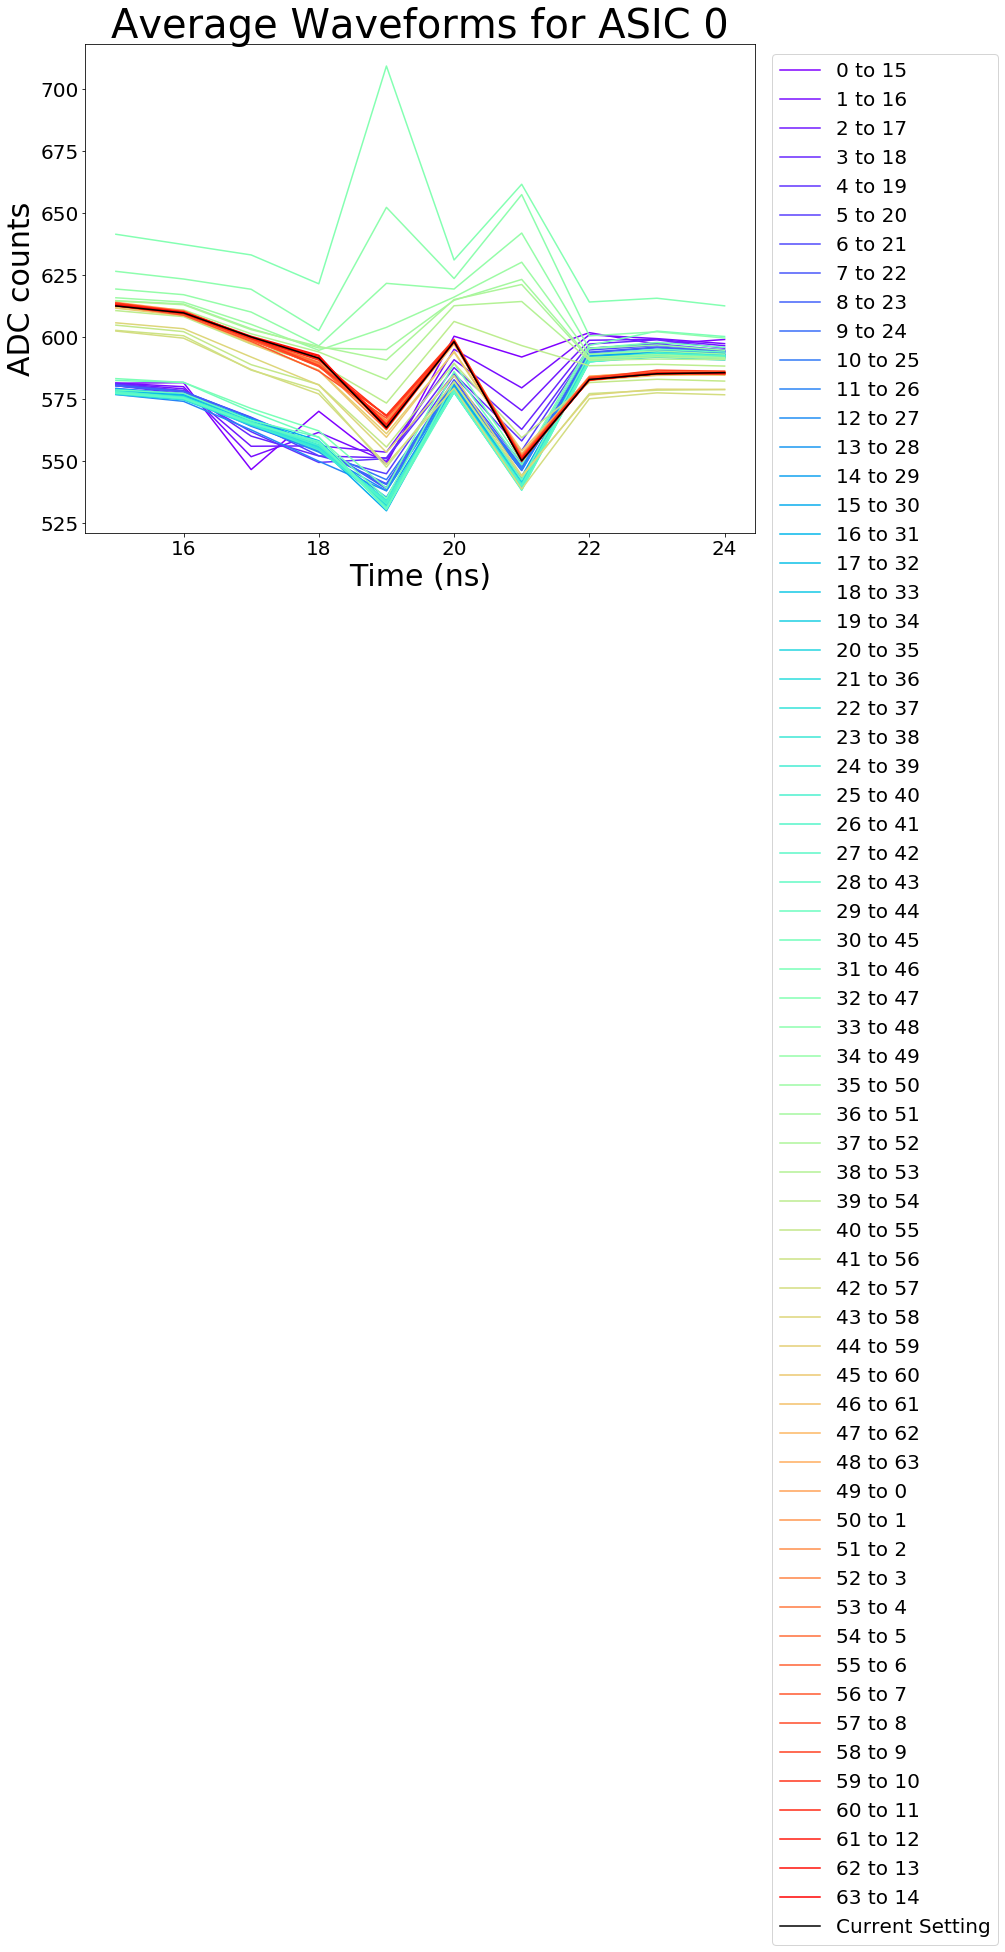

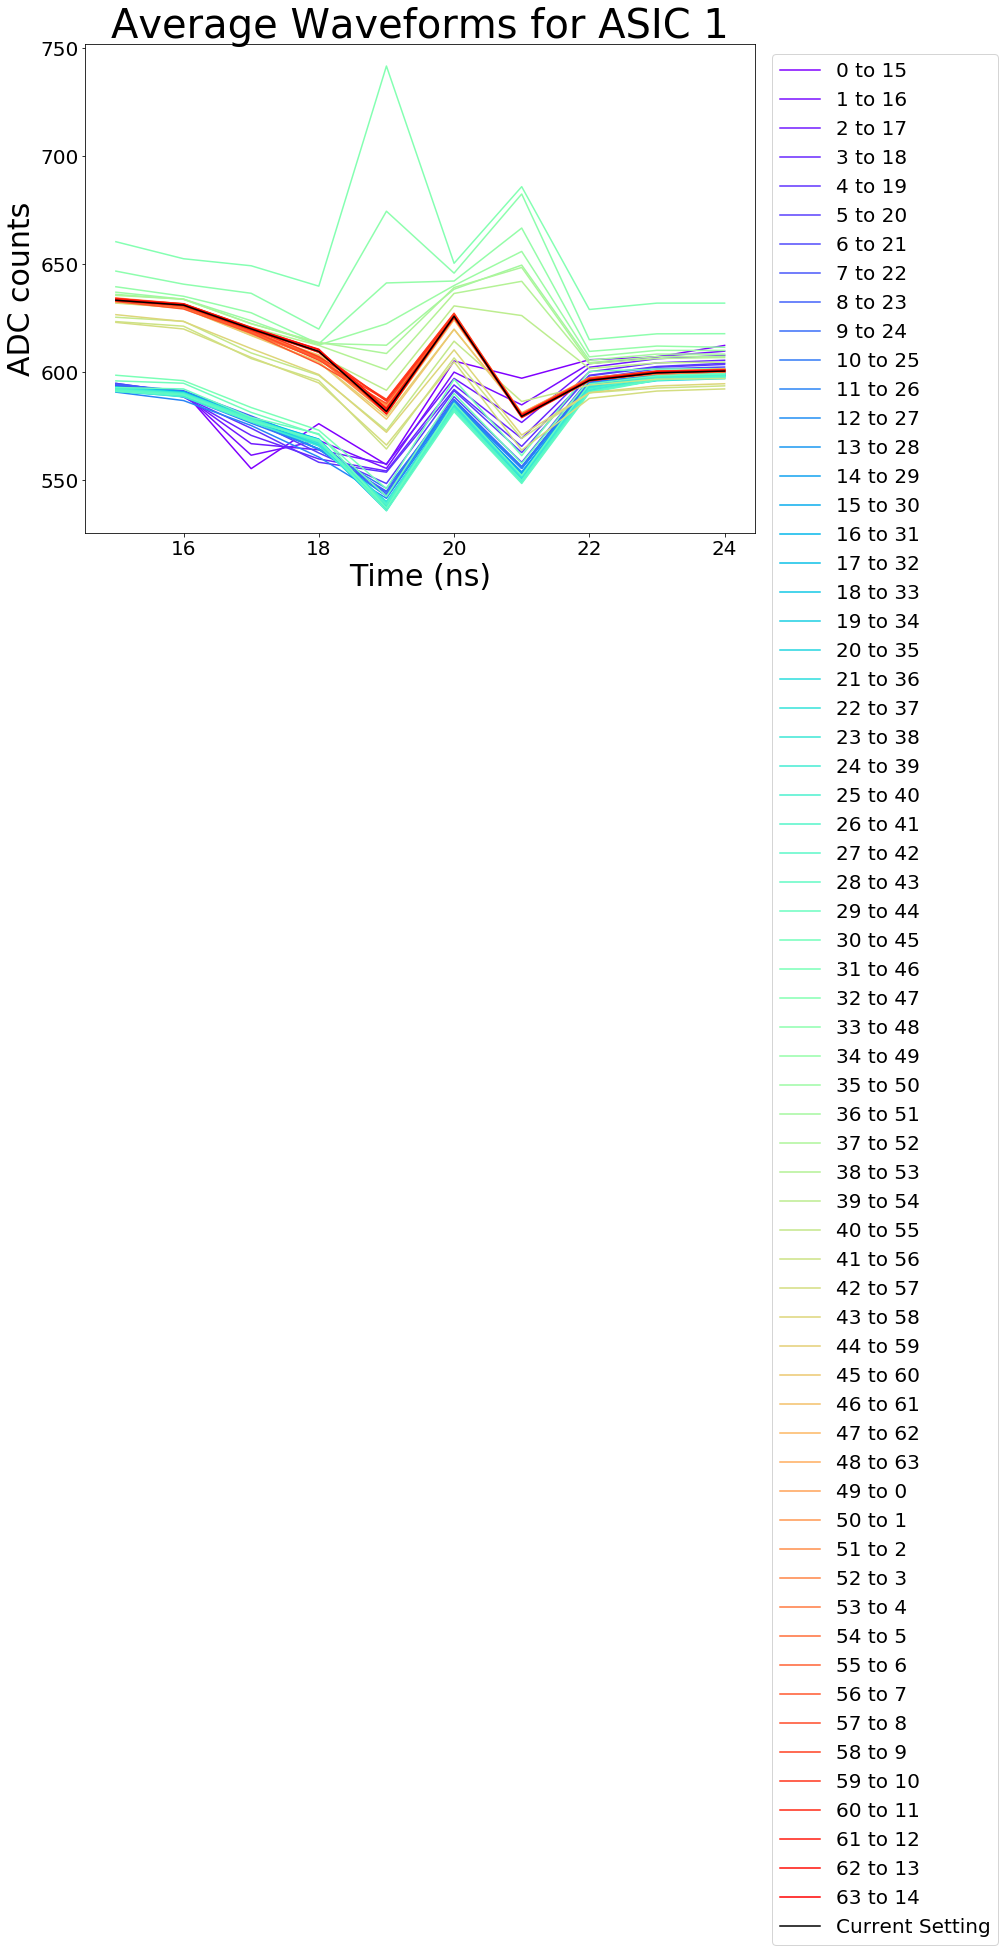

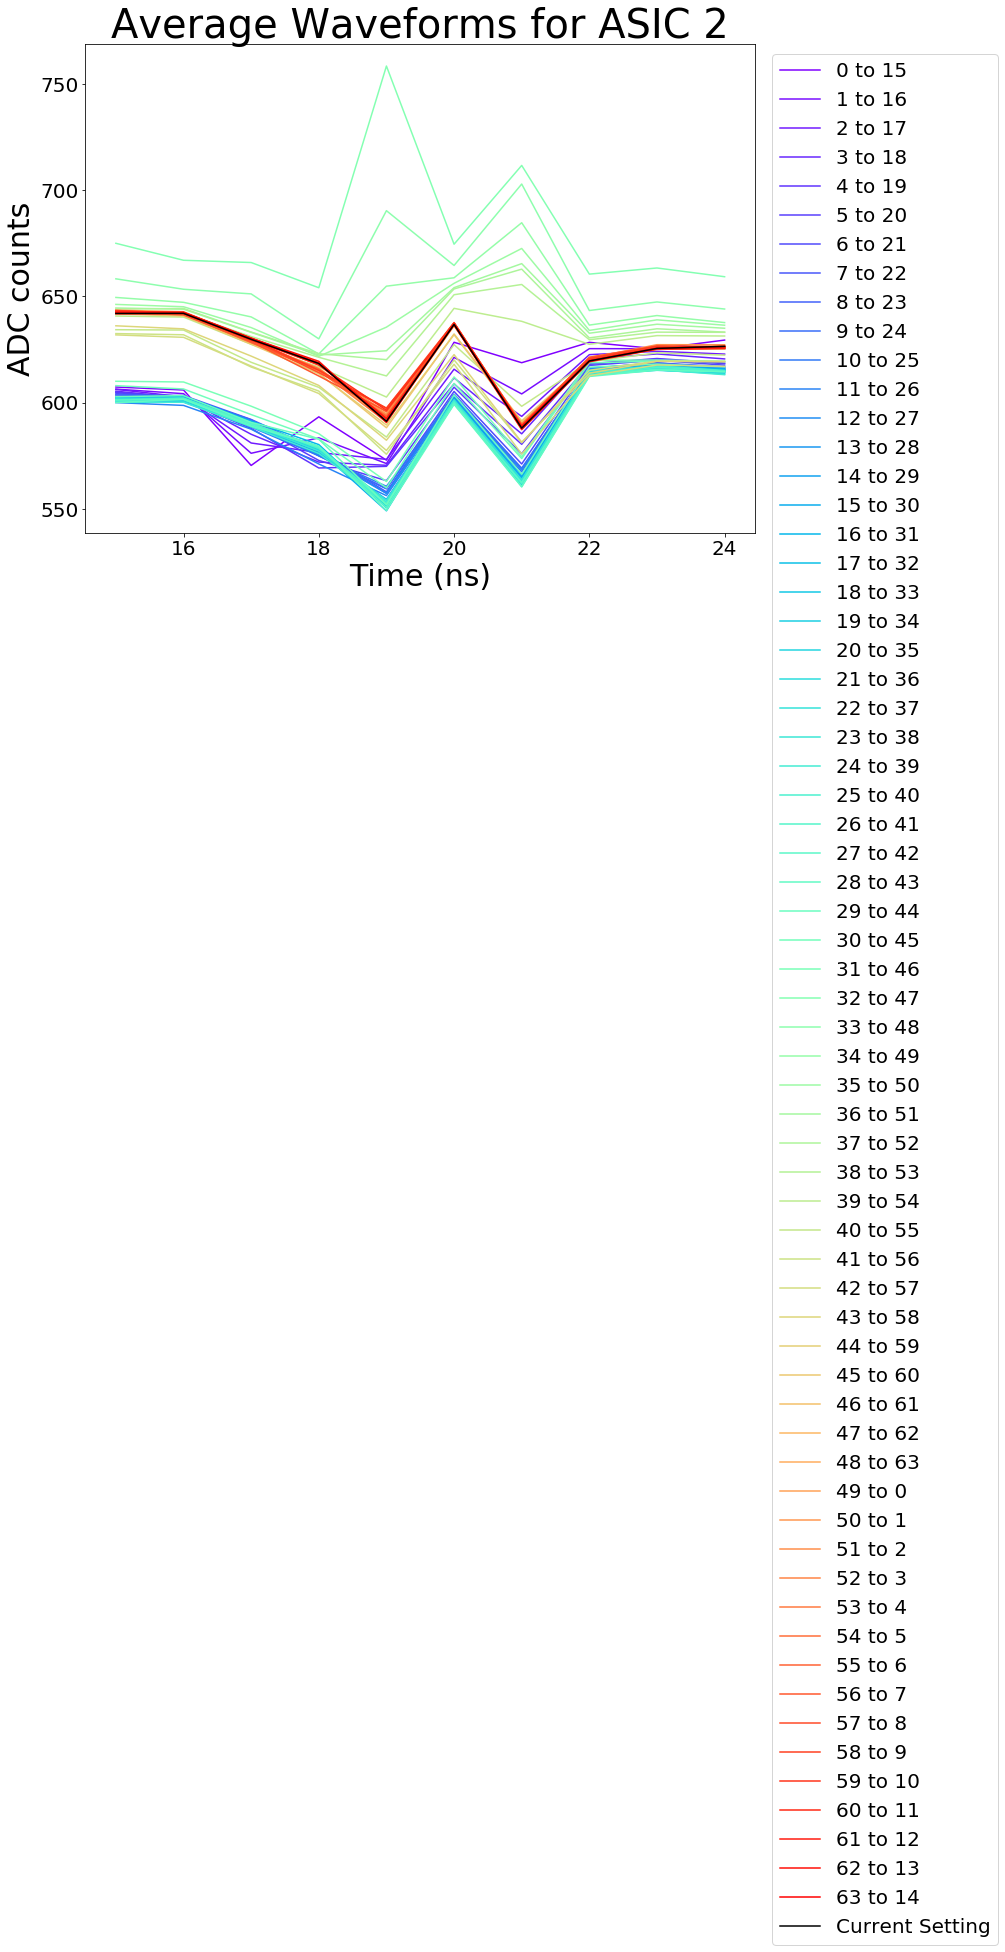

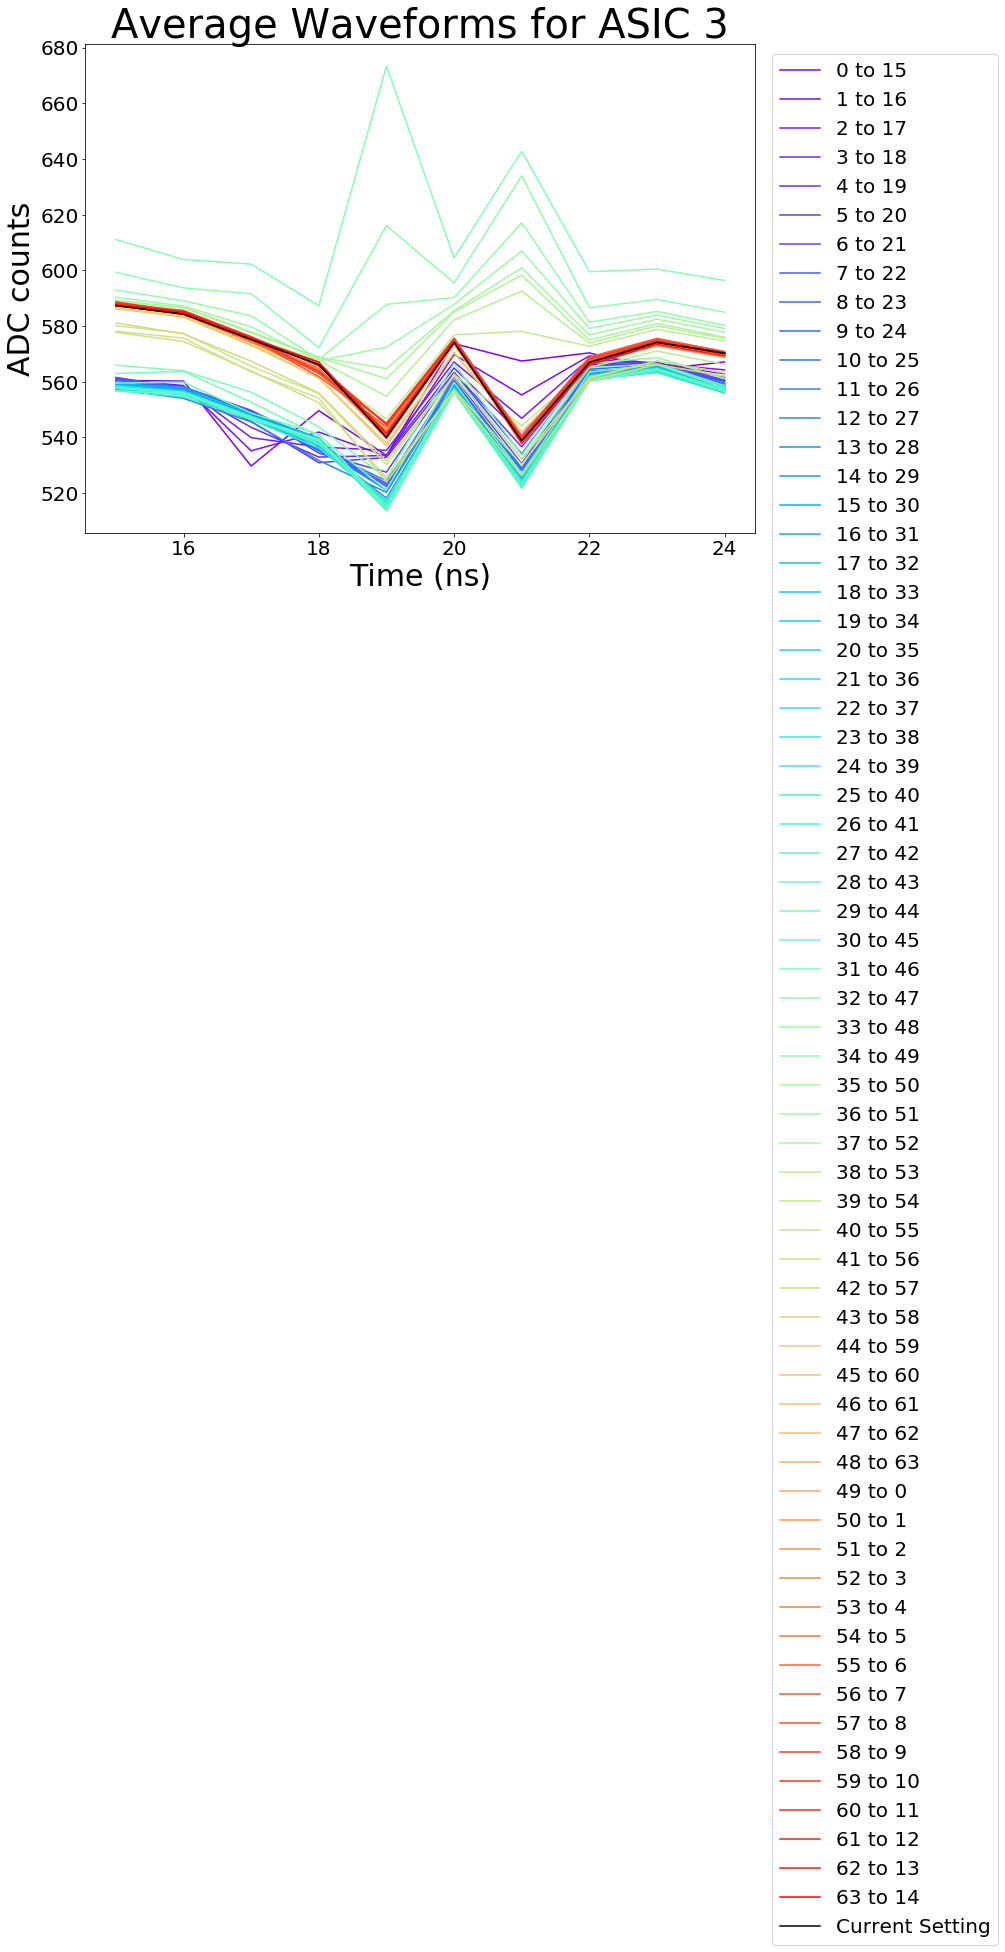

In [8]:
# Zoom in on glitch

x = [x for x in range(15,25)]
for ASIC in range(4):
    start_value = 0
    for run in range(64):
        plt.plot(x, Incr1[ASIC][run][15:25], label = str(start_value) + ' to ' + str((start_value + 15)%64), color = colors[run])
        start_value = start_value + 1
    plt.plot(x, Incr1[ASIC][63][15:25], label = 'Current Setting', color = 'black')
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

In [9]:
## Even Blocks only ##

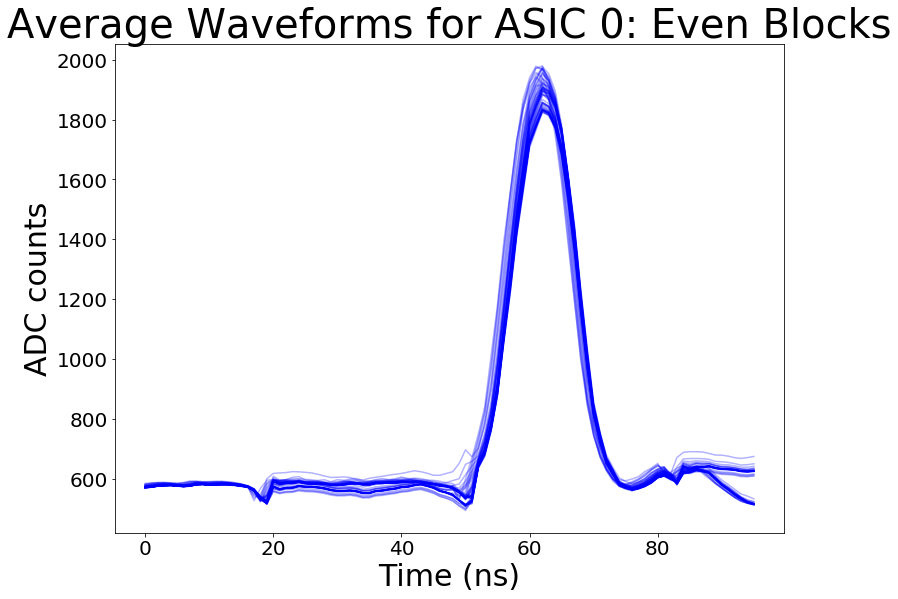

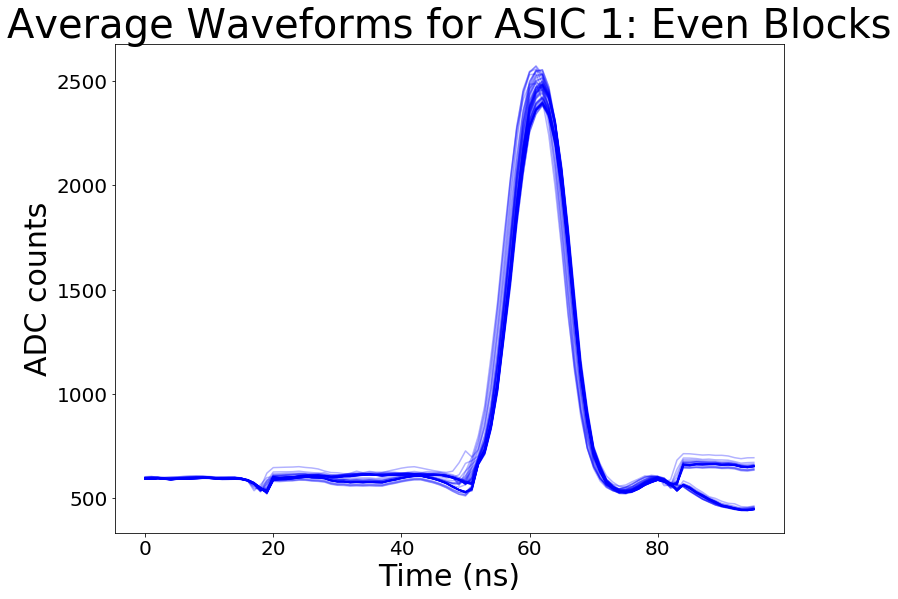

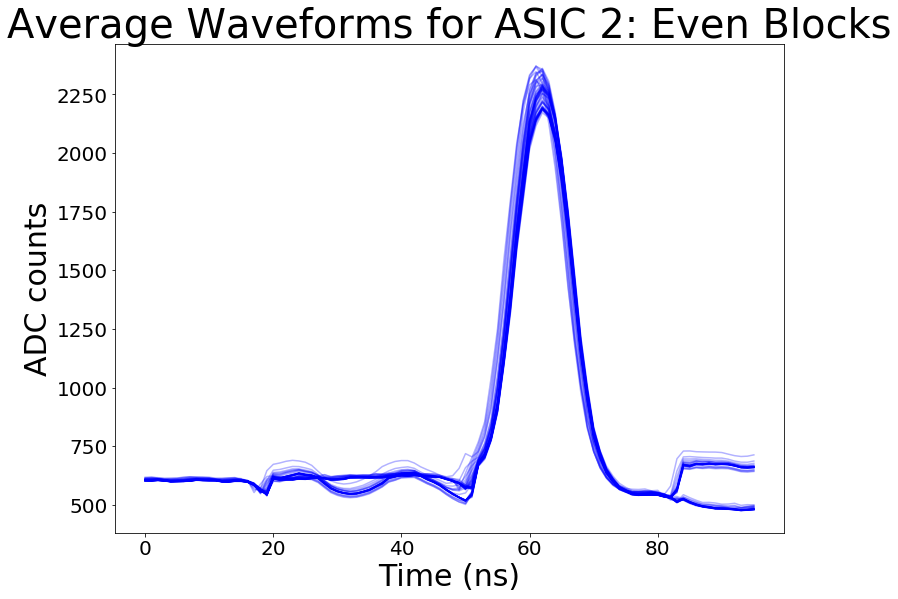

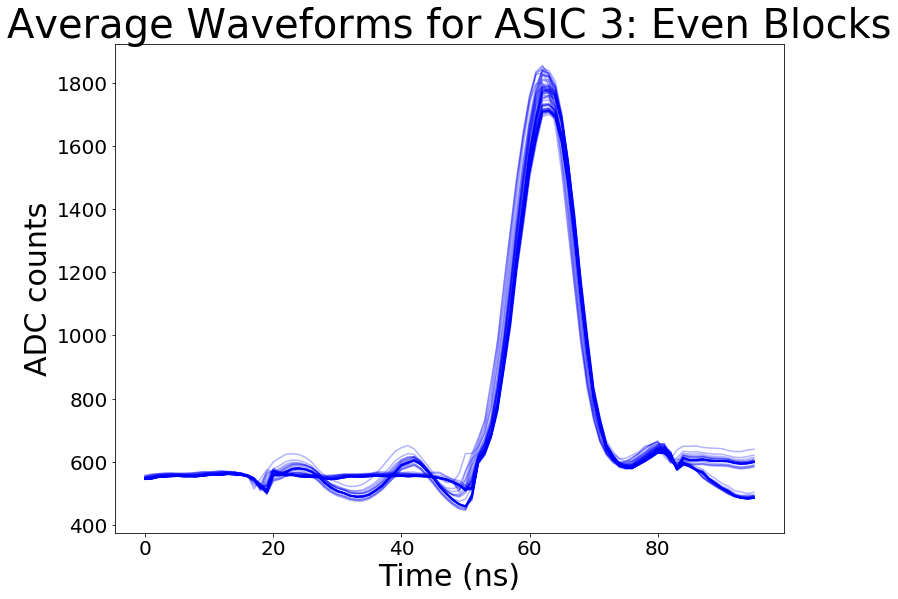

In [6]:
Incr1_even = []
for ASIC in range(4):
    runs = []
    start_value = 0
    for run in range(320624,320688):
        data = dict(np.load("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/Incr1 Location/sampleFileAllBlocks_run" + str(run) + "ASIC" + str(ASIC) + "CH6.npz", 'r'))
        waveforms = []
        for event in range(len(data['event'])):
            phase = int(data['phase'][event])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            block = int(data['block'][event])
            if block%2==0:
                waveforms.append(data['samples'][event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(len(waveforms)):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str((start_value + 15)%64), color = 'b', alpha = 0.3)
        start_value = start_value + 1
    Incr1_even.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ': Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.show()

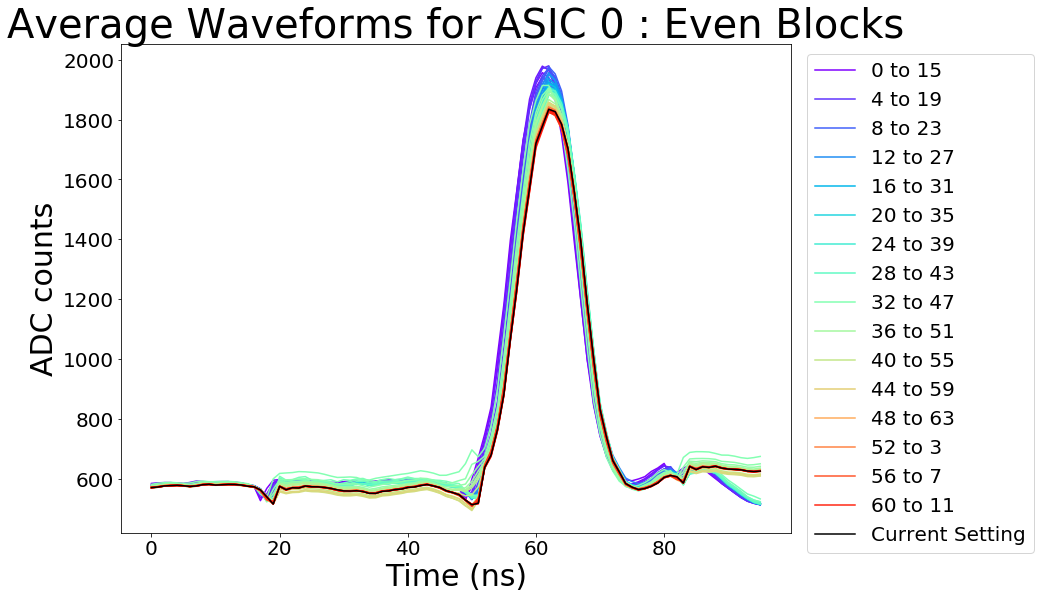

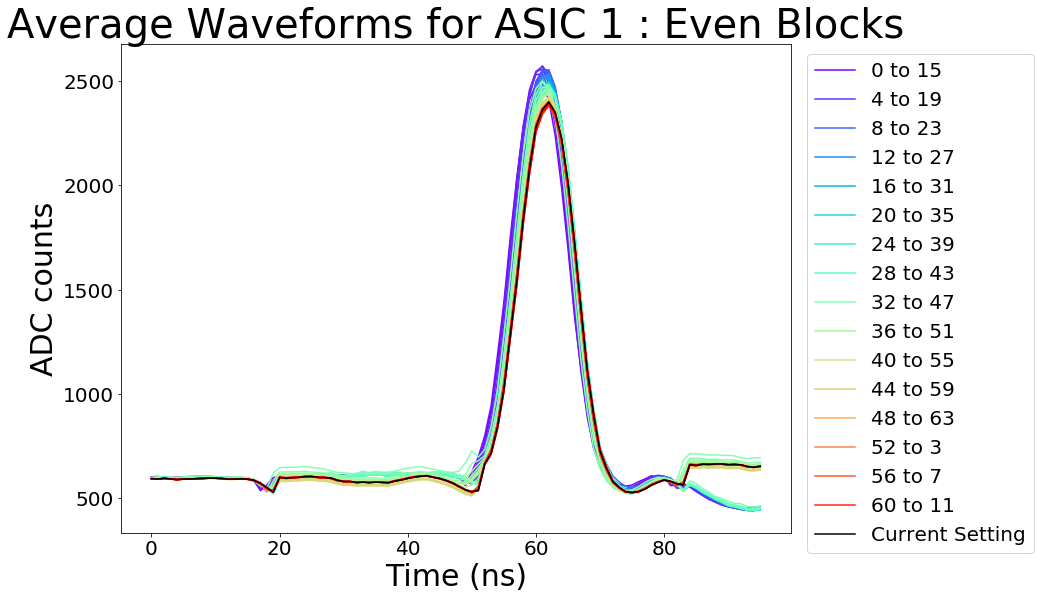

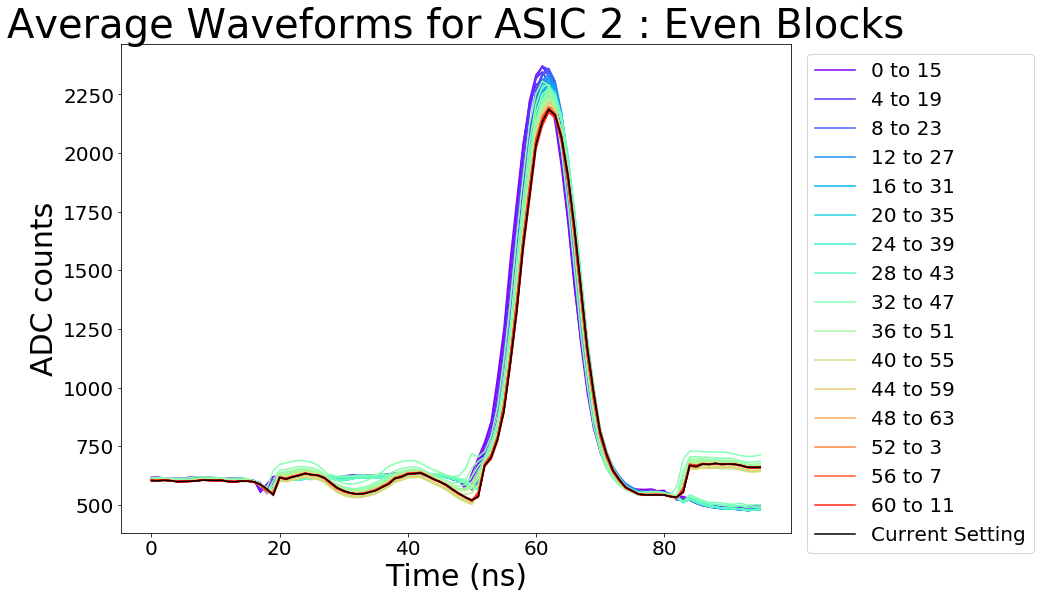

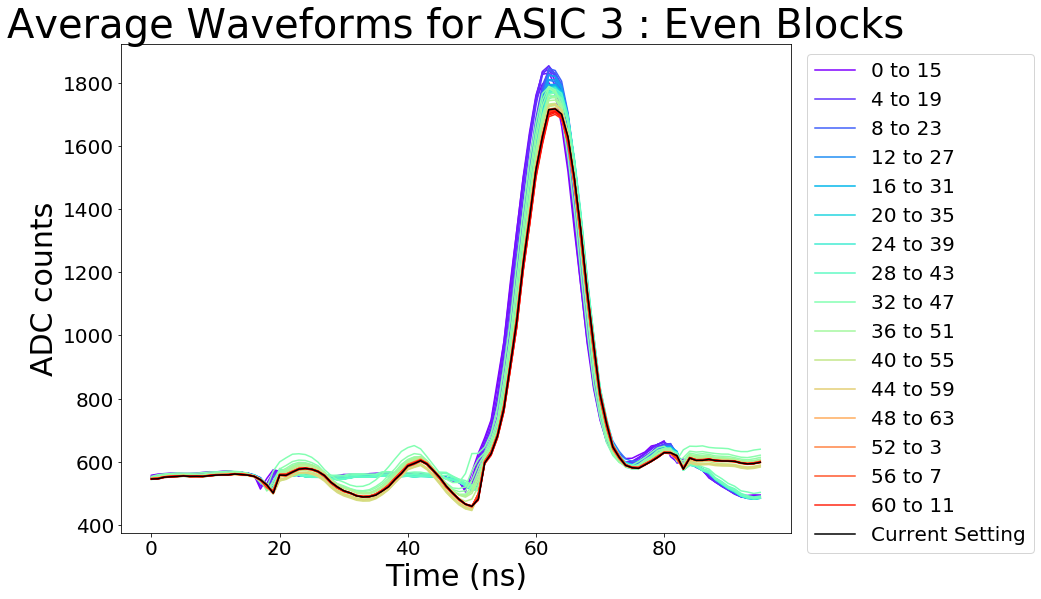

In [7]:
# Plot with rainbow colormap

number_runs = 64
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

for ASIC in range(4):
    start_value = 0
    for run in range(number_runs):
        if run%4==0:
            plt.plot(Incr1_even[ASIC][run], label = str(start_value) + ' to ' + str((start_value + 15)%64), color = colors[run])
            start_value = start_value + 1
        else:
            plt.plot(Incr1_even[ASIC][run], color = colors[run])
            start_value = start_value + 1
    plt.plot(Incr1_even[ASIC][63], label = 'Current Setting', color = 'black')
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

In [12]:
## Odd Blocks Only ##

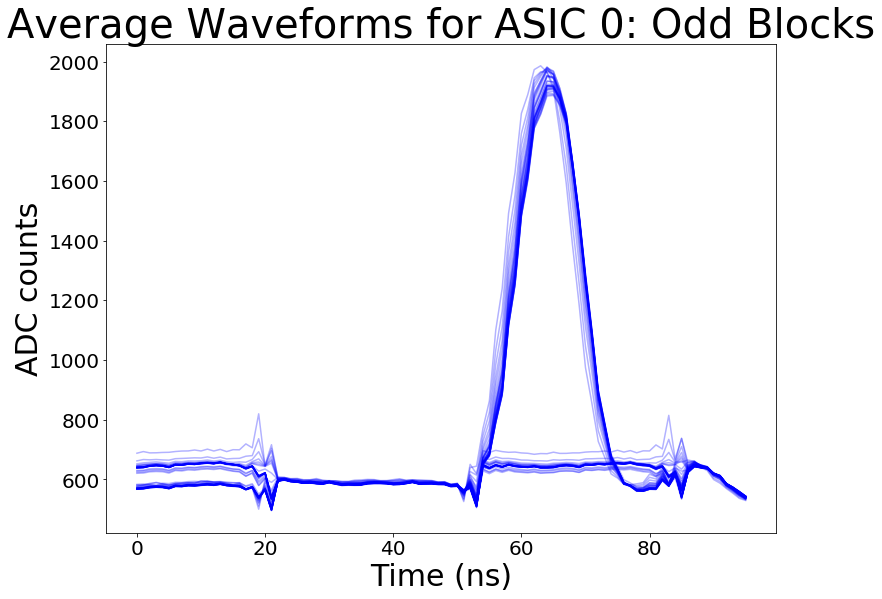

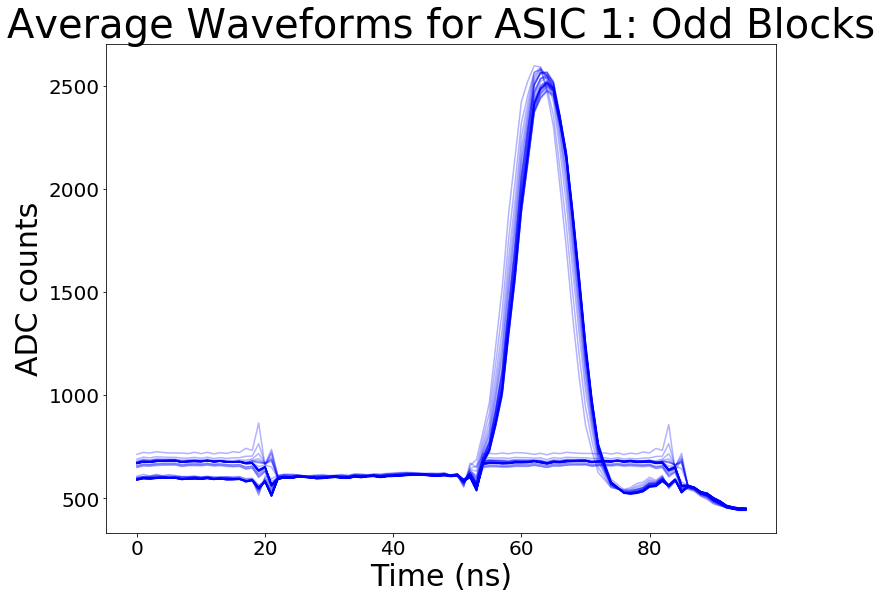

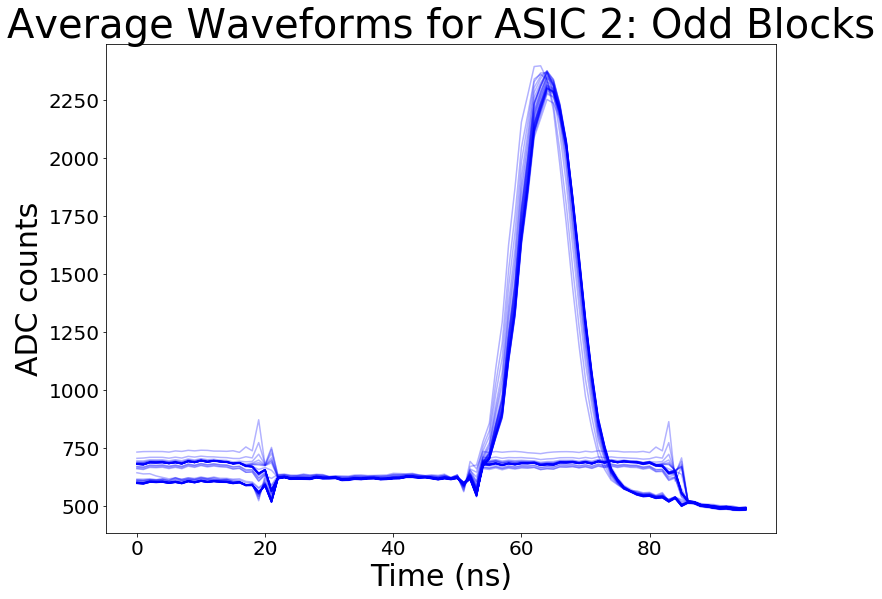

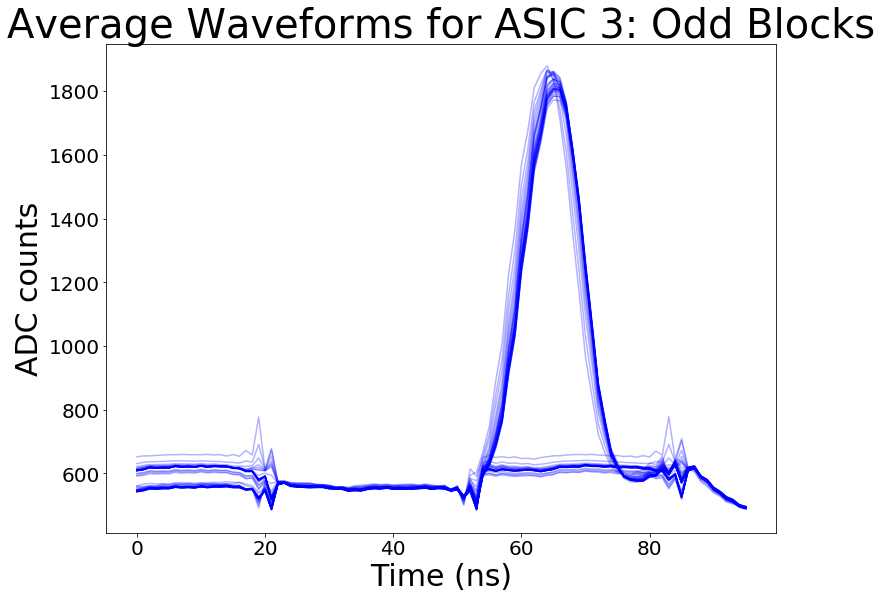

In [8]:
Incr1_odd = []
for ASIC in range(4):
    runs = []
    start_value = 0
    for run in range(320624,320688):
        data = dict(np.load("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/Incr1 Location/sampleFileAllBlocks_run" + str(run) + "ASIC" + str(ASIC) + "CH6.npz", 'r'))
        waveforms = []
        for event in range(len(data['event'])):
            phase = int(data['phase'][event])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            block = int(data['block'][event])
            if block%2!=0:
                waveforms.append(data['samples'][event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(len(waveforms)):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str((start_value + 15)%64), color = 'b', alpha = 0.3)
        start_value = start_value + 1
    Incr1_odd.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ': Odd Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.show()

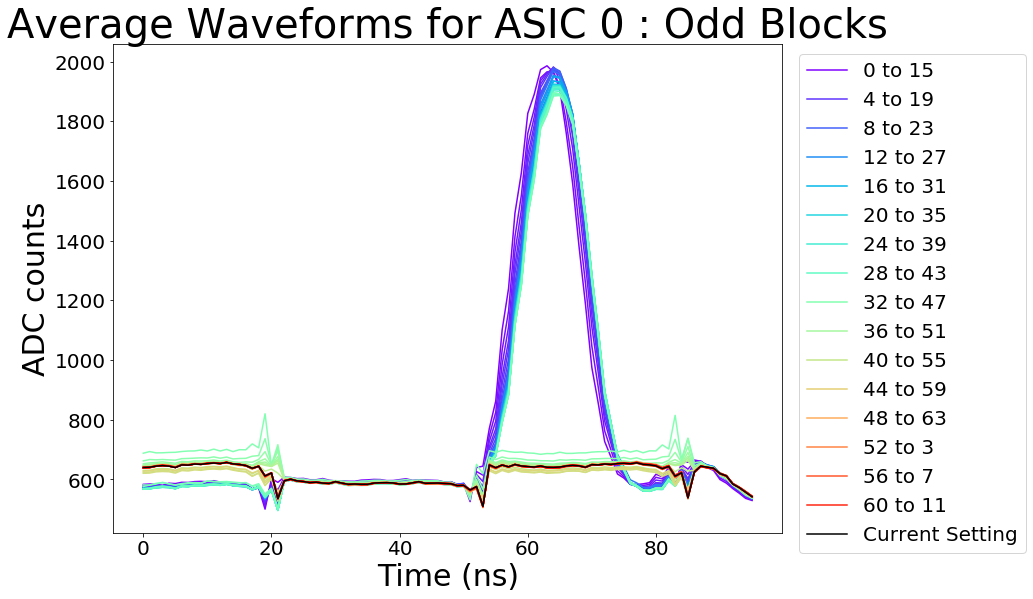

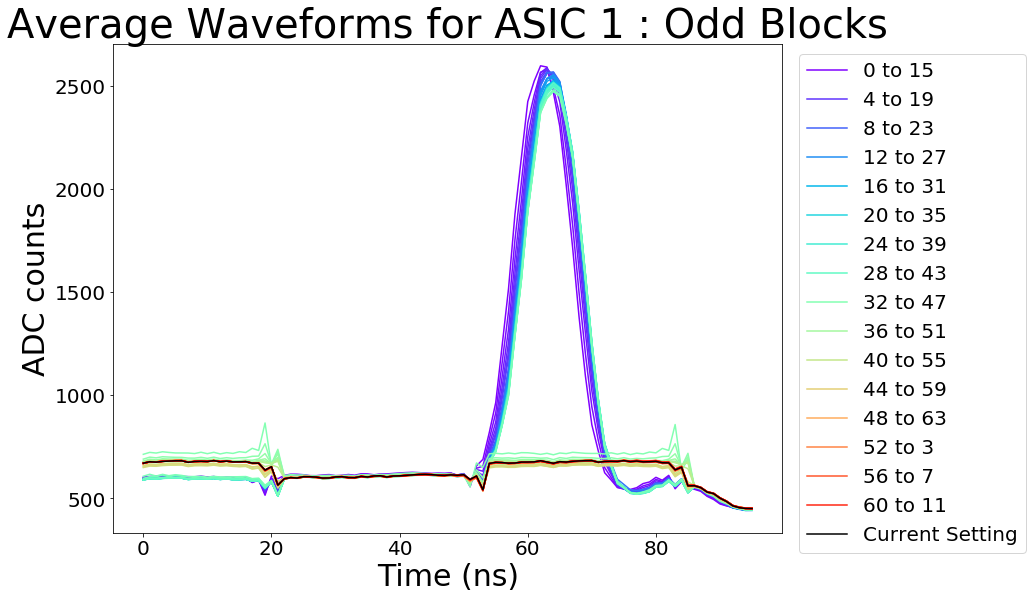

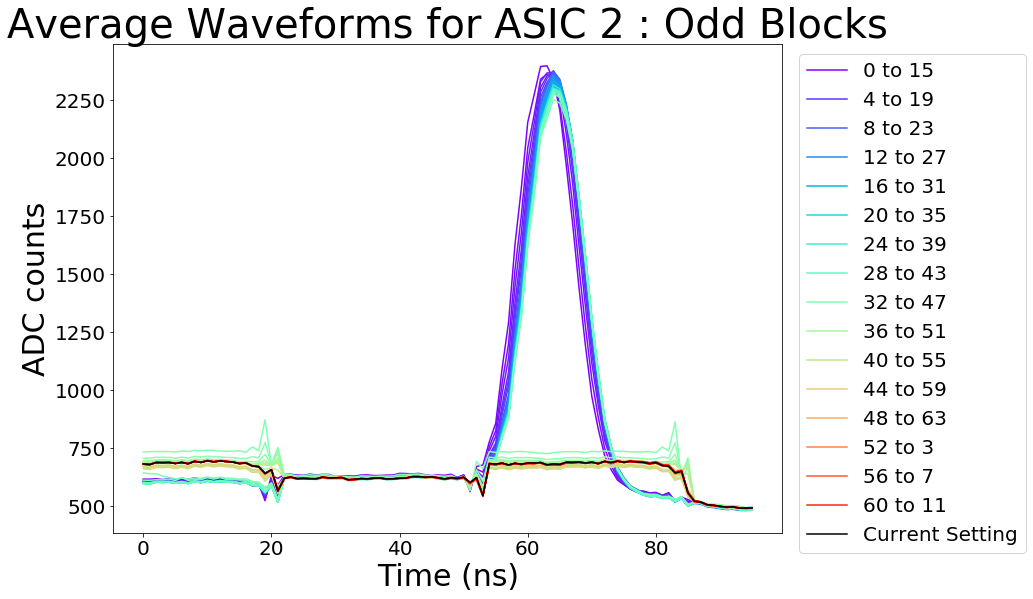

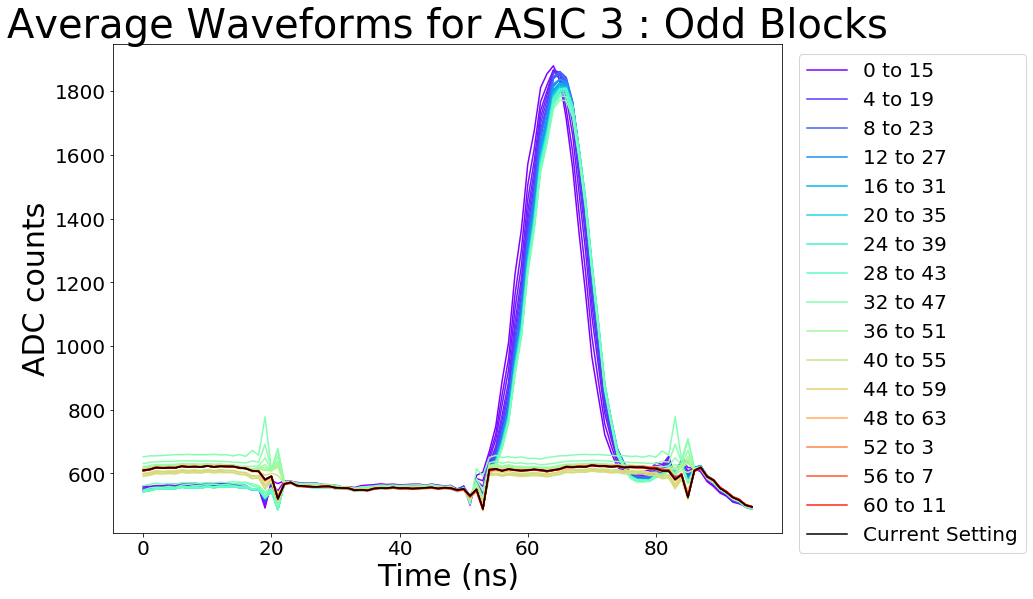

In [9]:
# Plot with rainbow colormap

number_runs = 64
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

for ASIC in range(4):
    start_value = 0
    for run in range(number_runs):
        if run%4==0:
            plt.plot(Incr1_odd[ASIC][run], label = str(start_value) + ' to ' + str((start_value + 15)%64), color = colors[run])
            start_value = start_value + 1
        else:
            plt.plot(Incr1_odd[ASIC][run], color = colors[run])
            start_value = start_value + 1
    plt.plot(Incr1_odd[ASIC][63], label = 'Current Setting', color = 'black')
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Odd Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

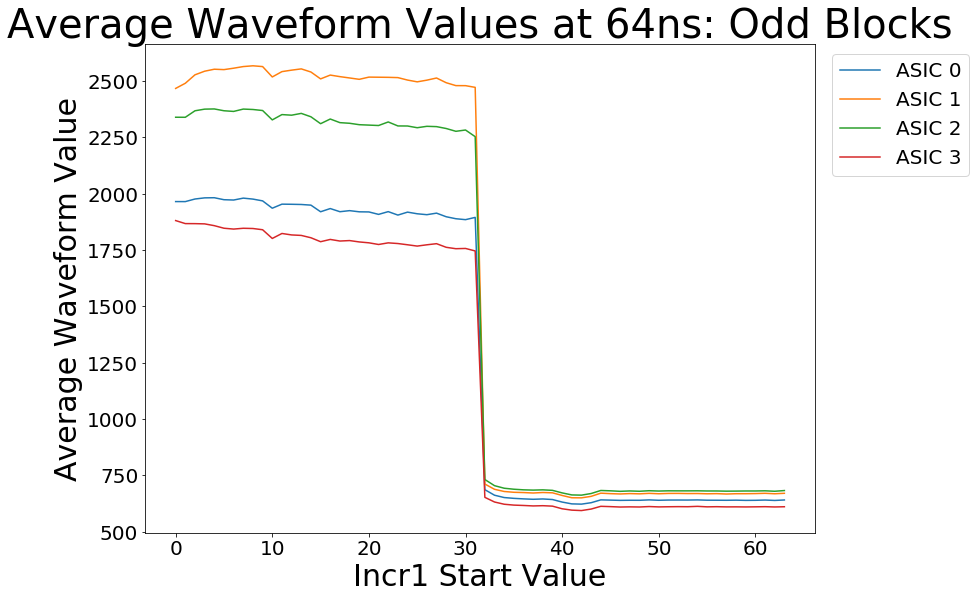

In [15]:
# Compare average waveform values at 64ns

start = [i for i in range(64)]
for ASIC in range(4):
    value = []
    for run in range(64):
        value.append(Incr1_odd[ASIC][run][64])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 64ns: Odd Blocks')
plt.xlabel('Incr1 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

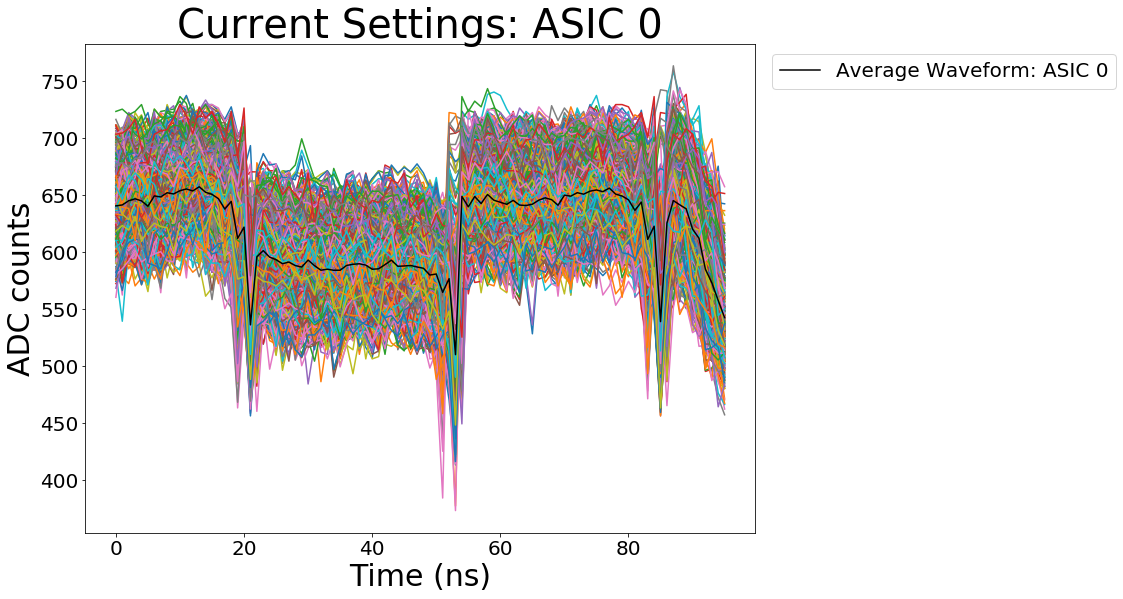

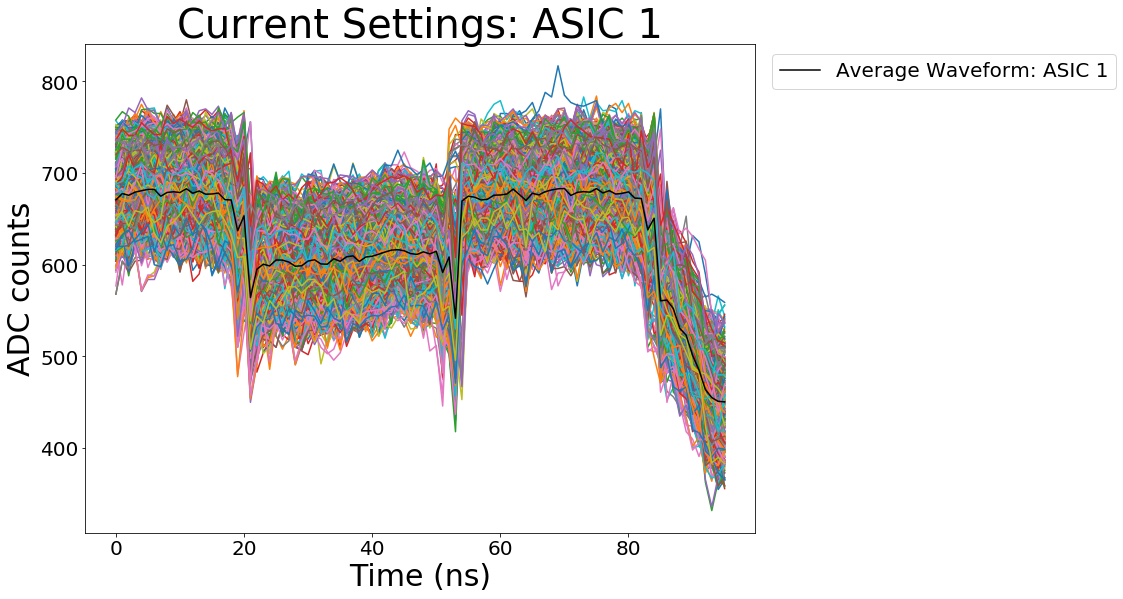

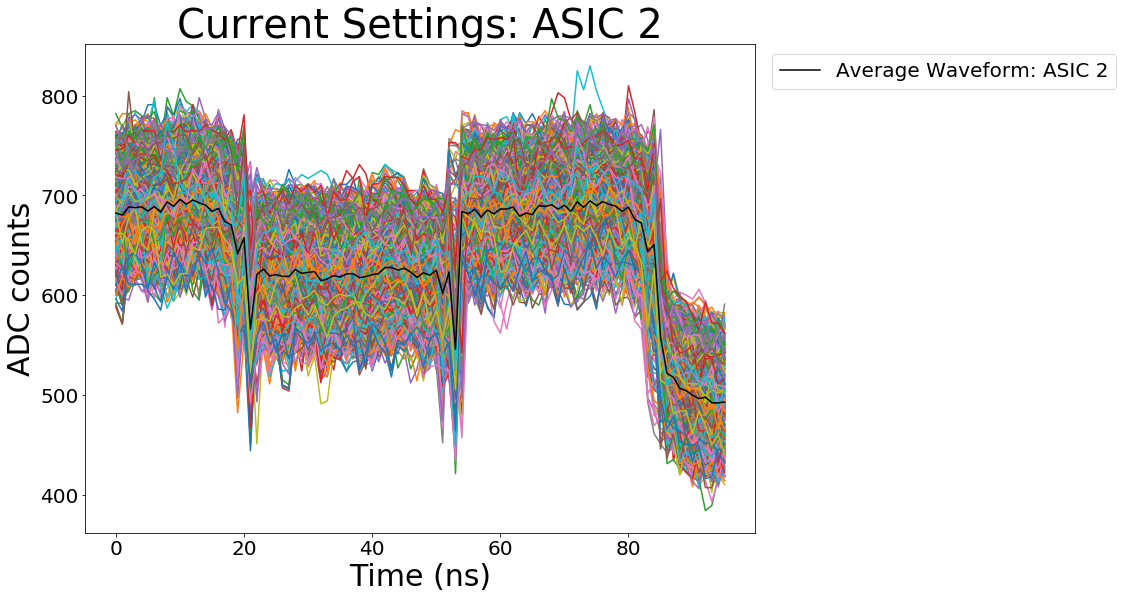

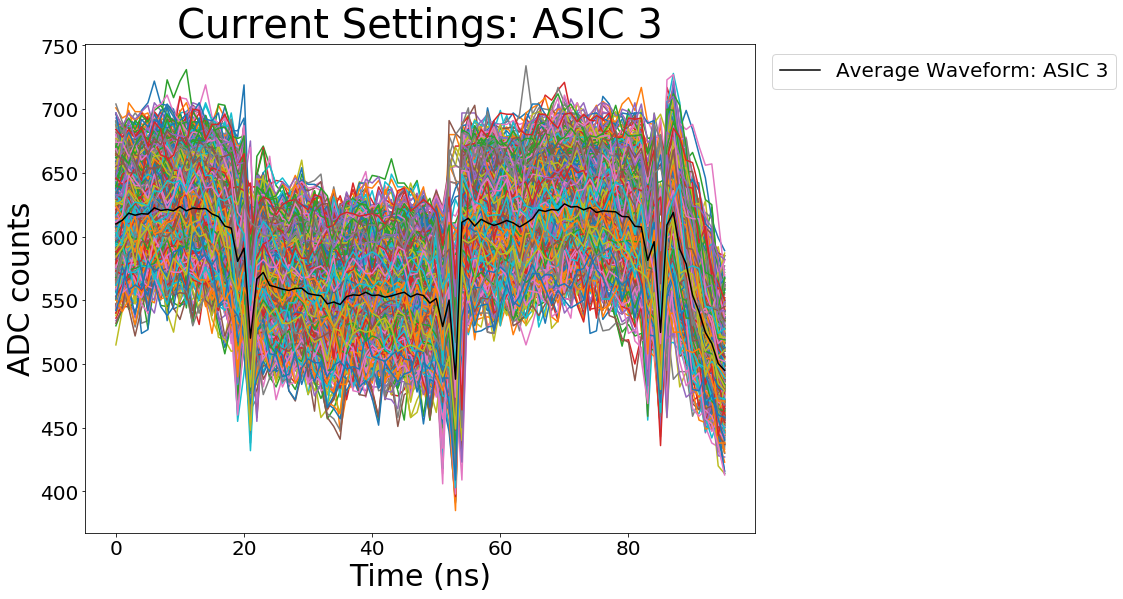

In [17]:
# Compare the best setting with the current setting
# Plot individual and average waveforms for Current Settings (Odd blocks only)
    
current = []
for ASIC in range(4):
    data = dict(np.load("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/Incr1 Location/sampleFileAllBlocks_run320687ASIC" + str(ASIC) + "CH6.npz", 'r'))
    waveforms = []
    for event in range(len(data['event'])):
        phase = int(data['phase'][event])
        shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
        block = int(data['block'][event])
        if block%2!=0:
            waveforms.append(data['samples'][event][shift: shift+96])
    
    avg_waveform = []
    for point in range(96):
        a = []
        for event in range(len(waveforms)):
            a.append(waveforms[event][point])
        avg_waveform.append(np.mean(a))
    current.append(avg_waveform)
    
    for event in range(500):
        plt.plot(waveforms[event])
    plt.plot(avg_waveform, label = 'Average Waveform: ASIC ' + str(ASIC), color = 'black')
    plt.title('Current Settings: ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

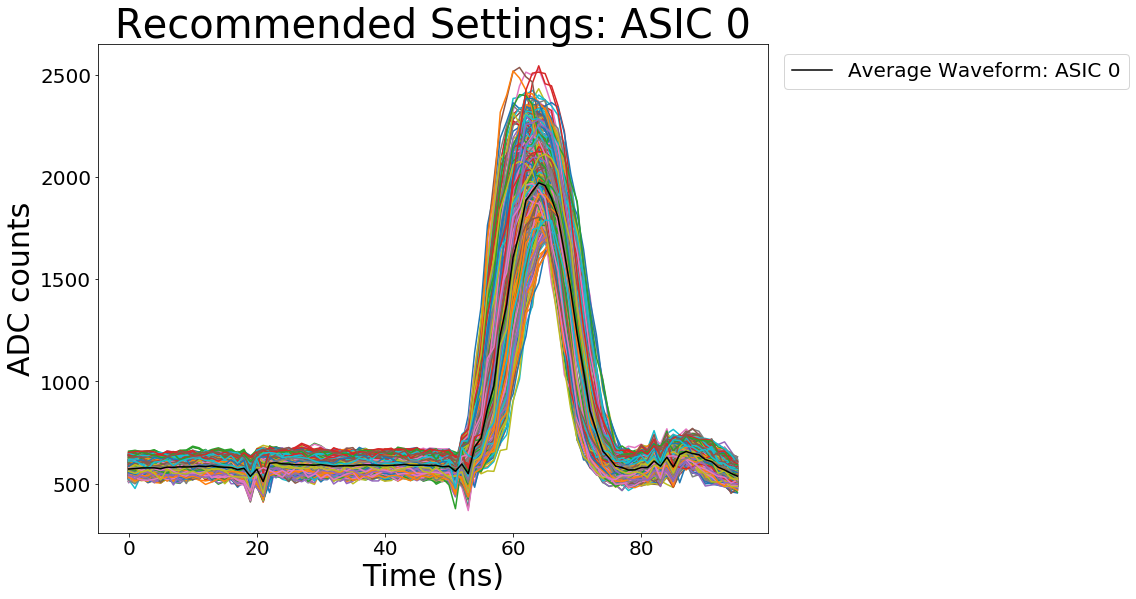

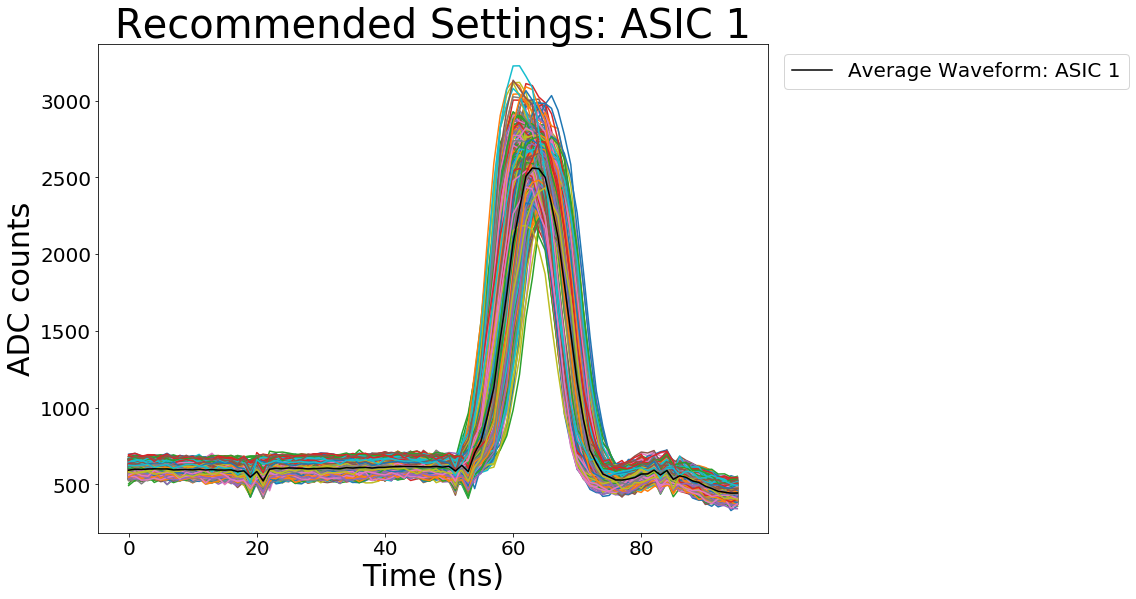

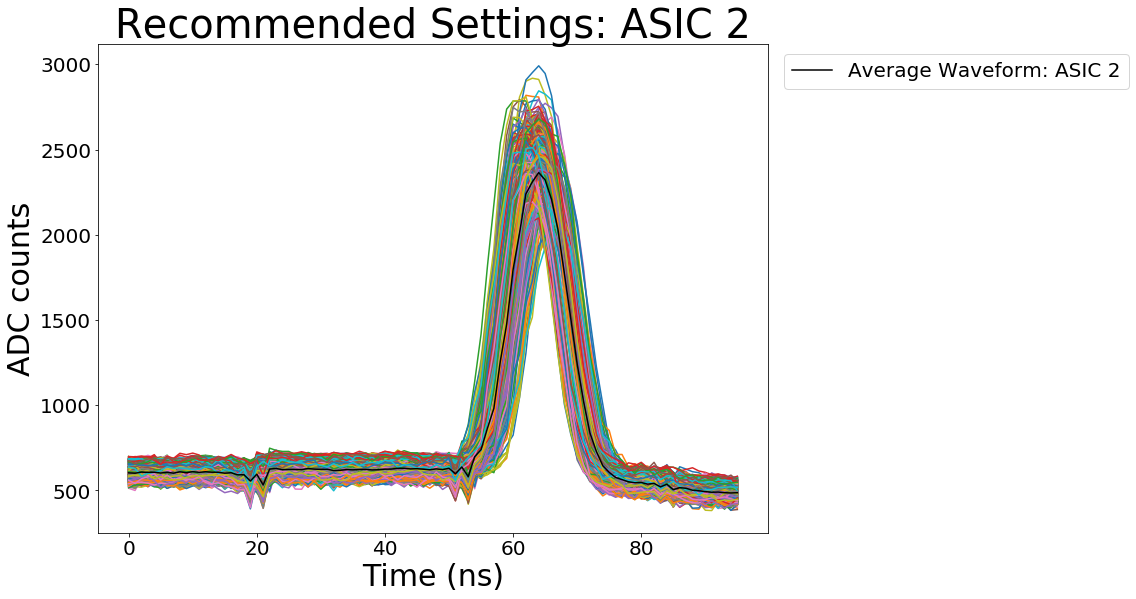

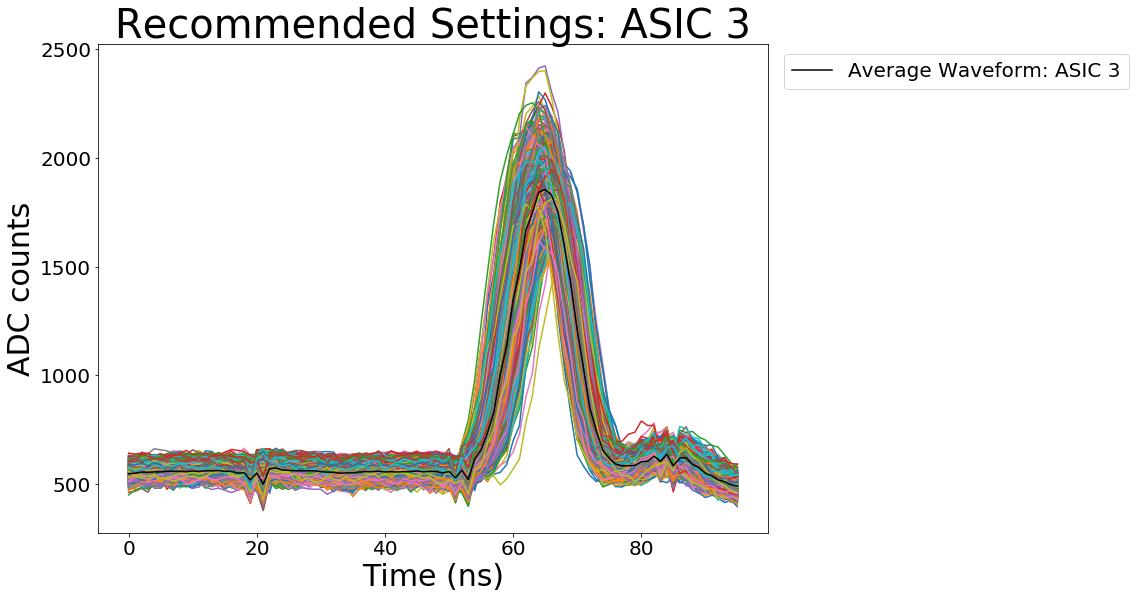

In [18]:
# Compare the best setting with the current setting
# Plot individual and average waveforms for Recommended Settings (Odd blocks only)
    
best = []
for ASIC in range(4):
    data = dict(np.load("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/Incr1 Location/sampleFileAllBlocks_run320630ASIC" + str(ASIC) + "CH6.npz", 'r'))
    waveforms = []
    for event in range(len(data['event'])):
        phase = int(data['phase'][event])
        shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
        block = int(data['block'][event])
        if block%2!=0:
            waveforms.append(data['samples'][event][shift: shift+96])
    
    avg_waveform = []
    for point in range(96):
        a = []
        for event in range(len(waveforms)):
            a.append(waveforms[event][point])
        avg_waveform.append(np.mean(a))
    best.append(avg_waveform)
    
    for event in range(500):
        plt.plot(waveforms[event])
    plt.plot(avg_waveform, label = 'Average Waveform: ASIC ' + str(ASIC), color = 'black')
    plt.title('Recommended Settings: ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

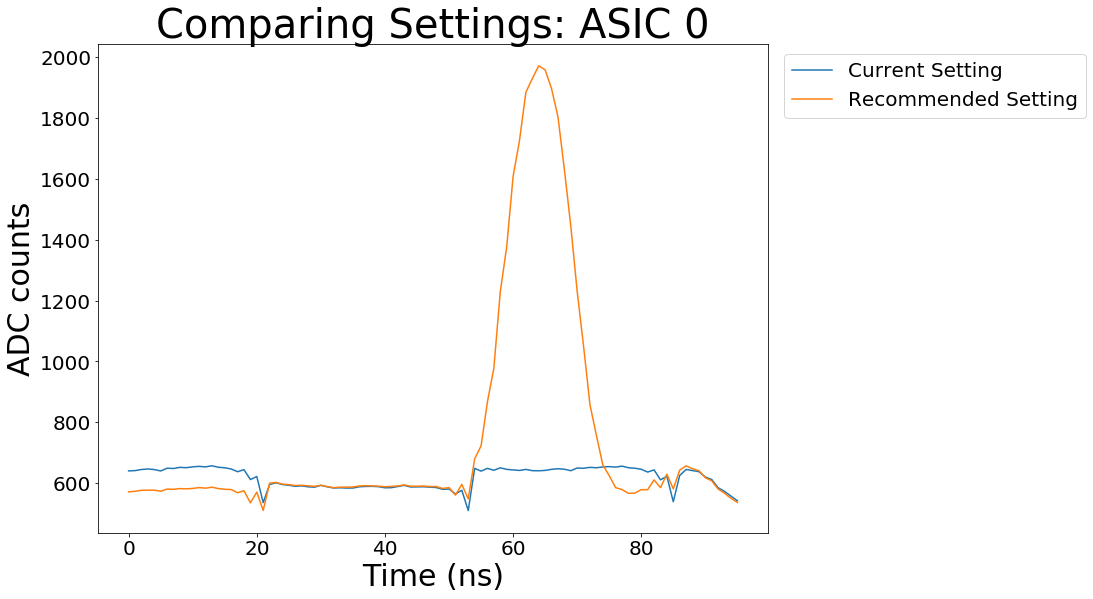

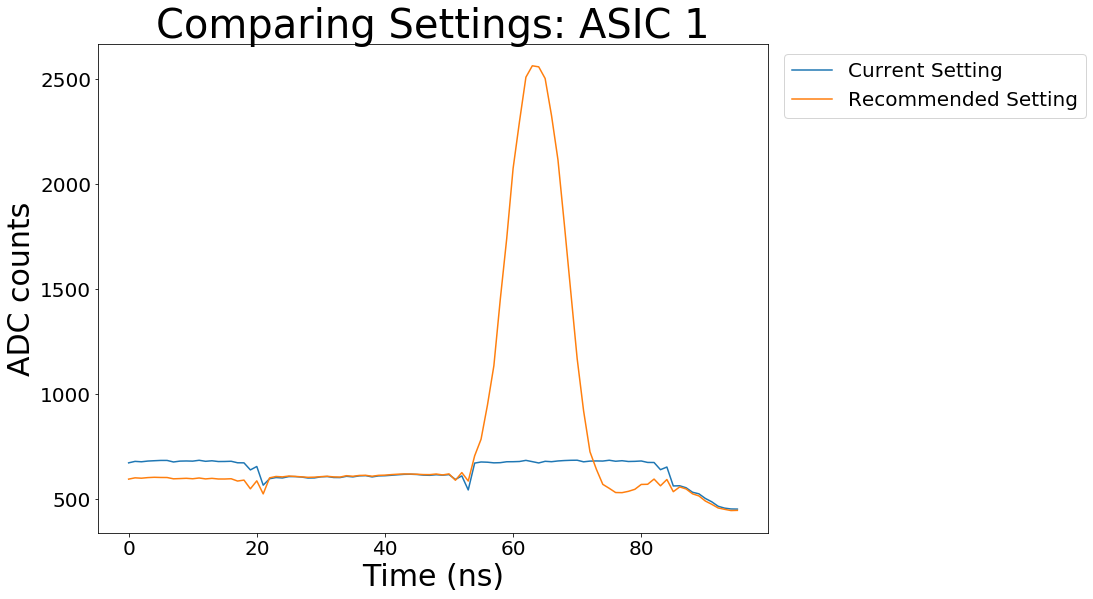

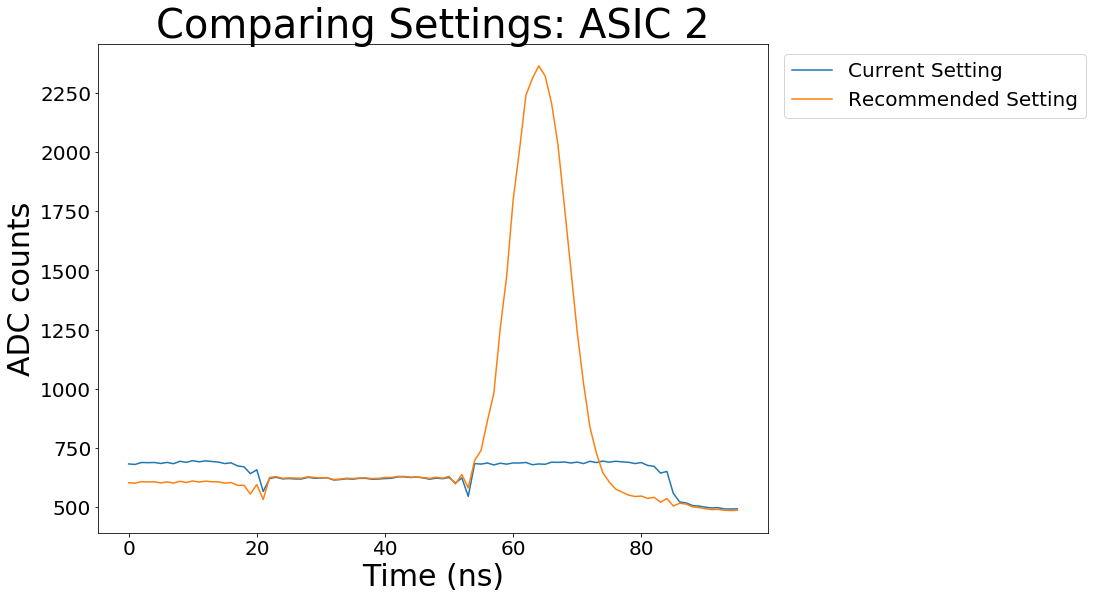

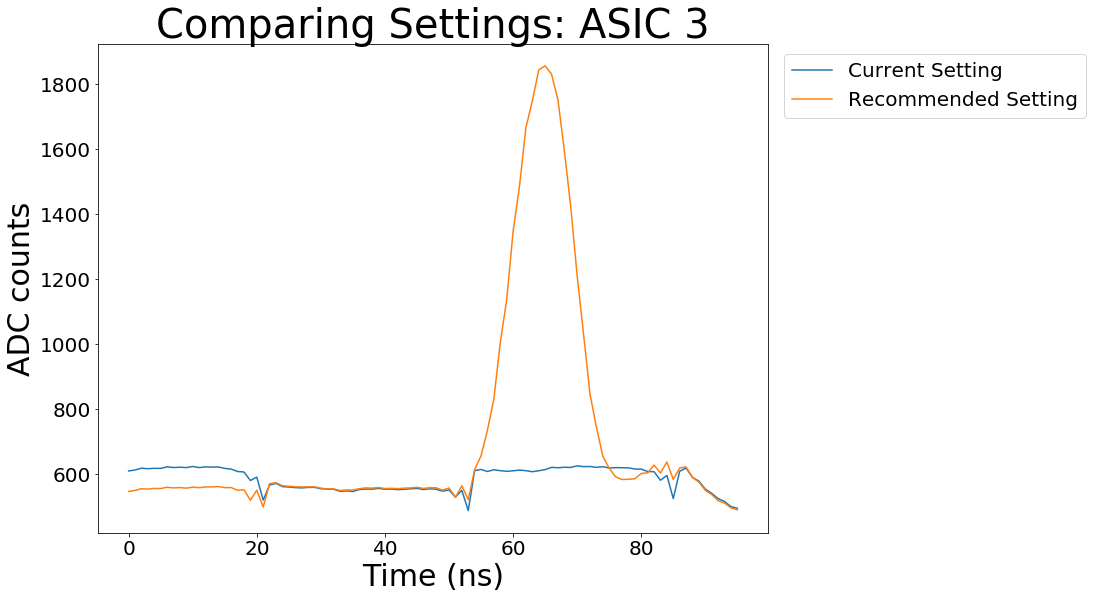

In [19]:
# Compare the best setting with the current setting
# Plot average waveforms for current and best settings

for ASIC in range(4):
    plt.plot(current[ASIC], label = 'Current Setting')
    plt.plot(best[ASIC], label = 'Recommended Setting')
    plt.title('Comparing Settings: ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()